In [1]:
from heft import heft, gantt
import numpy as np

In [2]:
comp_matrix_1 = heft.readCsvToNumpyMatrix('../test/canonicalgraph_task_exe_time.csv')
comm_matrix_1 = heft.readCsvToNumpyMatrix('../test/canonicalgraph_resource_BW.csv')
dag1 = heft.readDagMatrix('../test/canonicalgraph_task_connectivity.csv')

comp_matrix_2 = heft.readCsvToNumpyMatrix('../test/randomgraph_task_exe_time.csv')
comm_matrix_2 = heft.readCsvToNumpyMatrix('../test/randomgraph_resource_BW.csv')
dag2 = heft.readDagMatrix('../test/randomgraph_task_connectivity.csv')

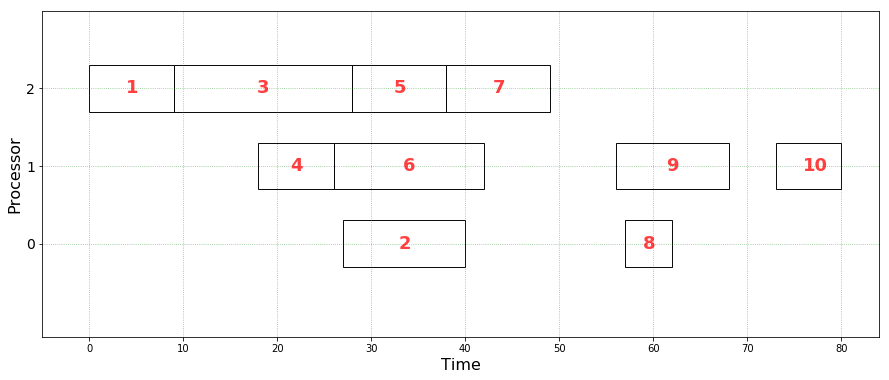

In [3]:
"""
Schedule the first graph with no existing schedules or time offset
"""
sched, _, _ = heft.schedule_dag(dag1, 
                                communication_matrix=comm_matrix_1, 
                                computation_matrix=comp_matrix_1)
gantt.showGanttChart(sched)

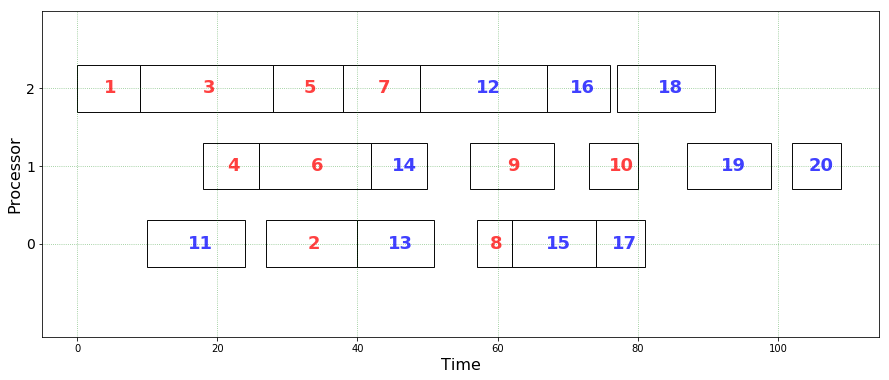

In [4]:
"""
Schedule the same task set again around the constraints of an existing schedule by passing in the previous
list of processor schedules. Also uses a time offset of 10
"""
sched, _, _ = heft.schedule_dag(dag1, 
                                communication_matrix=comm_matrix_1, 
                                computation_matrix=comp_matrix_1, 
                                proc_schedules=sched, 
                                time_offset=10)
gantt.showGanttChart(sched)

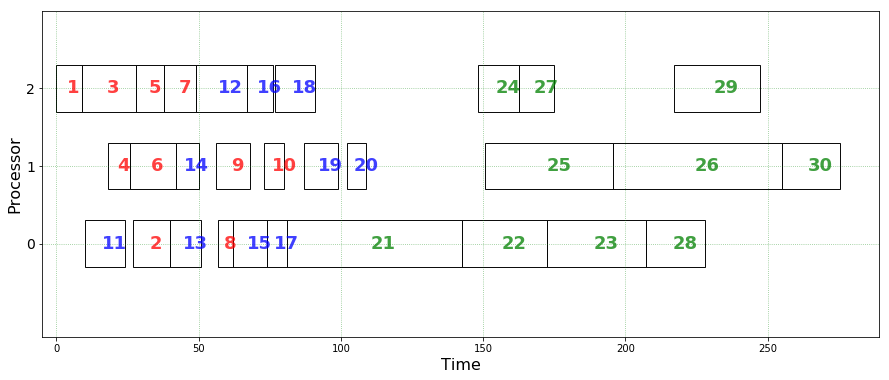

In [5]:
"""
Schedule the second dag around the constraints of two previously scheduled dags with a time offset of 30
"""
sched, _, _ = heft.schedule_dag(dag2, 
                                communication_matrix=comm_matrix_2, 
                                computation_matrix=comp_matrix_2, 
                                proc_schedules=sched, 
                                time_offset=30)
gantt.showGanttChart(sched)

In [6]:
"""
Assuming no existing schedules, give an example of the new array output format
"""
sched, _, new_format = heft.schedule_dag(dag1, 
                                         communication_matrix=comm_matrix_1, 
                                         computation_matrix=comp_matrix_1)
new_format

array([[2, 0],
       [0, 0],
       [2, 1],
       [1, 0],
       [2, 2],
       [1, 1],
       [2, 3],
       [0, 1],
       [1, 2],
       [1, 3]], dtype=uint8)

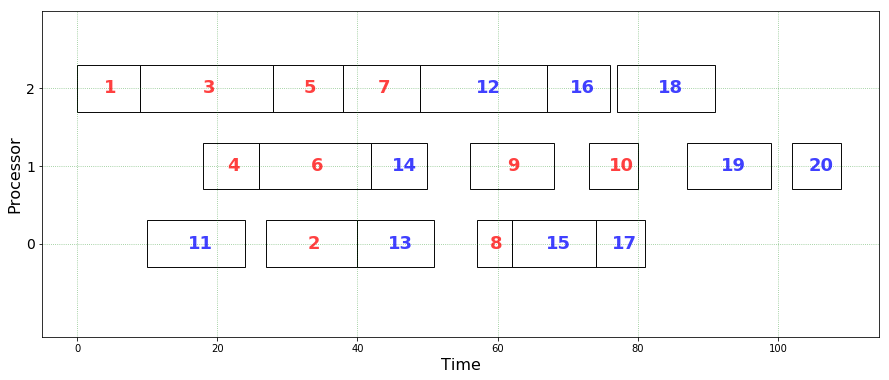

array([[2, 0],
       [0, 1],
       [2, 1],
       [1, 0],
       [2, 2],
       [1, 1],
       [2, 3],
       [0, 3],
       [1, 3],
       [1, 4],
       [0, 0],
       [2, 4],
       [0, 2],
       [1, 2],
       [0, 4],
       [2, 5],
       [0, 5],
       [2, 6],
       [1, 5],
       [1, 6]], dtype=uint8)

In [7]:
"""
If there are existing schedules, give an example of how the relative order of tasks in the array output can change
ex: Task 2 went from [0, 0] to [0, 1] because of node 11 and Task 8 went from [0, 1] to [0, 3]
"""
sched, _, new_format = heft.schedule_dag(dag1,
                                    communication_matrix=comm_matrix_1,
                                    computation_matrix=comp_matrix_1,
                                    proc_schedules=sched,
                                    time_offset=10)
gantt.showGanttChart(sched)
new_format

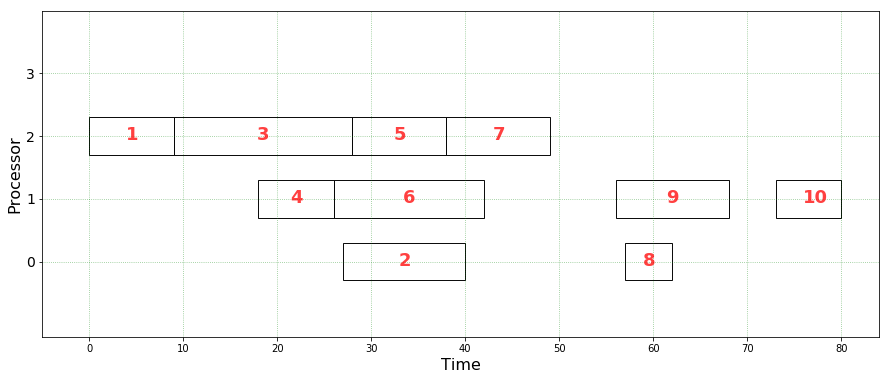

In [8]:
"""
Test basic scheduling of a graph with infs/unsupported resources in the computation matrix
"""
inf_comp = np.concatenate((comp_matrix_1, np.inf * np.ones((10, 1))), axis=1)

inf_comm = np.concatenate((comm_matrix_1, [[1], [1], [1]]), axis=1)
inf_comm = np.concatenate((inf_comm, [[1, 1, 1, 0]]), axis=0)

sched, _, new_format = heft.schedule_dag(dag1, 
                                        computation_matrix=inf_comp,
                                        communication_matrix=inf_comm)
gantt.showGanttChart(sched)